In [114]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.metrics import log_loss
from sklearn import metrics
from sklearn.metrics import log_loss

In [115]:
raw_train_data = pd.read_csv("D:\\train.csv")
raw_test_data = pd.read_csv("D:\\test.csv")

In [116]:
print(raw_train_data.shape)
print(raw_test_data.shape)

(61878, 95)
(144368, 94)


In [117]:
Train_data = raw_train_data.iloc[:, 1:95]
labels = set(Train_data.iloc[:,93:94].target)
Valid_x = np.array(raw_test_data.iloc[:, 1:94])
Total_x = np.array(Train_data.iloc[:,0:93])
Total_y = np.array(Train_data.iloc[:,93:94])

In [118]:
print(f"The current has the following label {labels}")
print(f"The shape the Total_X {Total_x.shape}")
print(f"The shape the Total_Y {Total_y.shape}")
print(f"The shape the Valid_X {Valid_x.shape}")
print(f"Check Nan in Total_X {set(np.isnan(Total_x).any(axis=1))}")
# print(f"Check Nan in Train_Y {np.isnan(Train_Y).any(axis=1)}")
print(f"Check Nan in Valid_X {set(np.isnan(Valid_x).any(axis=1))}")

The current has the following label {'Class_9', 'Class_5', 'Class_6', 'Class_7', 'Class_8', 'Class_3', 'Class_2', 'Class_4', 'Class_1'}
The shape the Total_X (61878, 93)
The shape the Total_Y (61878, 1)
The shape the Valid_X (144368, 93)
Check Nan in Total_X {False}
Check Nan in Valid_X {False}


In [119]:
np.random.seed(10)
Total_X,Total_Y = shuffle(Total_x,Total_y)

In [120]:
# In this part using the previous 50000 to do the training and the last data to do the test check the score
Train_X = Total_X[:50000]
Train_Y = Total_Y[:50000]
Test_X = Total_X[50000:]
Test_Y = Total_Y[50000:]
print(Train_X.shape)
print(Train_Y.shape)
print(Test_X.shape)
print(Test_Y.shape)

(50000, 93)
(50000, 1)
(11878, 93)
(11878, 1)


In [121]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [122]:
DT_normal_model = DecisionTreeClassifier(random_state=0)
DT_normal_model.fit(Train_X, Train_Y.ravel())

DecisionTreeClassifier(random_state=0)

In [123]:
DT_norm_predict = DT_normal_model.predict(Test_X)
DT_norm_predict_proba = DT_normal_model.predict_proba(Test_X)
print(DT_norm_predict)

['Class_2' 'Class_6' 'Class_5' ... 'Class_5' 'Class_6' 'Class_2']


In [124]:
normal_DT_report = metrics.classification_report(Test_Y,DT_norm_predict)
log_loss_result_DT = log_loss(Test_Y, DT_norm_predict_proba)

In [125]:
print(normal_DT_report)
print(log_loss_result_DT)

              precision    recall  f1-score   support

     Class_1       0.36      0.40      0.38       346
     Class_2       0.71      0.71      0.71      3070
     Class_3       0.47      0.51      0.49      1484
     Class_4       0.43      0.43      0.43       495
     Class_5       0.94      0.96      0.95       586
     Class_6       0.90      0.89      0.89      2730
     Class_7       0.53      0.45      0.48       554
     Class_8       0.82      0.81      0.81      1650
     Class_9       0.77      0.75      0.76       963

    accuracy                           0.72     11878
   macro avg       0.66      0.65      0.66     11878
weighted avg       0.72      0.72      0.72     11878

9.627705728535895


In [126]:
from sklearn.ensemble import AdaBoostClassifier

In [127]:
DT_Ada_model = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=200,learning_rate=0.1,random_state=0)
DT_Ada_model.fit(Train_X, Train_Y.ravel())

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=0.1,
                   n_estimators=200, random_state=0)

In [128]:
DT_Ada_predict = DT_Ada_model.predict(Test_X)
DT_Ada_predict_proba = DT_Ada_model.predict_proba(Test_X)

In [129]:
Ada_DT_report = metrics.classification_report(Test_Y,DT_Ada_predict)
Ada_DT_log_loss = log_loss(Test_Y, DT_Ada_predict_proba)

In [130]:
print(Ada_DT_report)
print(Ada_DT_log_loss)

              precision    recall  f1-score   support

     Class_1       0.37      0.40      0.38       346
     Class_2       0.71      0.70      0.71      3070
     Class_3       0.46      0.51      0.48      1484
     Class_4       0.45      0.43      0.44       495
     Class_5       0.95      0.96      0.95       586
     Class_6       0.90      0.89      0.90      2730
     Class_7       0.50      0.45      0.48       554
     Class_8       0.82      0.81      0.81      1650
     Class_9       0.76      0.75      0.76       963

    accuracy                           0.72     11878
   macro avg       0.66      0.66      0.66     11878
weighted avg       0.72      0.72      0.72     11878

9.668414843667126


In [131]:
Ada_Model = AdaBoostClassifier(n_estimators=200, random_state=0)
Ada_Model.fit(Train_X, Train_Y.ravel())

AdaBoostClassifier(n_estimators=200, random_state=0)

In [132]:
Ada_Model_predict = Ada_Model.predict(Test_X)
Ada_Model_predict_proba = Ada_Model.predict_proba(Test_X)

In [133]:
Ada_Model_report = metrics.classification_report(Test_Y,Ada_Model_predict)
Ada_Model_loss = log_loss(Test_Y, Ada_Model_predict_proba)

In [134]:
print(Ada_Model_report)
print(Ada_Model_loss)

              precision    recall  f1-score   support

     Class_1       0.31      0.33      0.32       346
     Class_2       0.74      0.36      0.48      3070
     Class_3       0.34      0.59      0.43      1484
     Class_4       0.30      0.41      0.35       495
     Class_5       0.73      0.97      0.83       586
     Class_6       0.86      0.90      0.88      2730
     Class_7       0.50      0.36      0.42       554
     Class_8       0.76      0.82      0.79      1650
     Class_9       0.76      0.70      0.73       963

    accuracy                           0.64     11878
   macro avg       0.59      0.61      0.58     11878
weighted avg       0.68      0.64      0.64     11878

2.0850846305166644


In [135]:
ground_truth_dict = {"Class_1":0,"Class_2":0,"Class_3":0,"Class_4":0,"Class_5":0,"Class_6":0,"Class_7":0,"Class_8":0,"Class_9":0}
DT_result_dict = {"Class_1":0,"Class_2":0,"Class_3":0,"Class_4":0,"Class_5":0,"Class_6":0,"Class_7":0,"Class_8":0,"Class_9":0}
Ada_DT_result_dict = {"Class_1":0,"Class_2":0,"Class_3":0,"Class_4":0,"Class_5":0,"Class_6":0,"Class_7":0,"Class_8":0,"Class_9":0}
Ada_result_dict = {"Class_1":0,"Class_2":0,"Class_3":0,"Class_4":0,"Class_5":0,"Class_6":0,"Class_7":0,"Class_8":0,"Class_9":0}

In [136]:
for item in Test_Y:
    ground_truth_dict[item[-1]] += 1
print(f"ground_truth_dict: {ground_truth_dict}")
    
for item in DT_norm_predict:
    DT_result_dict[item] += 1
print(f"DT_result_dict: {DT_result_dict}")
    
for item in DT_Ada_predict:
    Ada_DT_result_dict[item] += 1
print(f"Ada_DT_result_dict: {Ada_DT_result_dict}")

for item in Ada_Model_predict:
    Ada_result_dict[item] += 1
print(f"Ada_result_dict: {Ada_result_dict}")

ground_truth_dict: {'Class_1': 346, 'Class_2': 3070, 'Class_3': 1484, 'Class_4': 495, 'Class_5': 586, 'Class_6': 2730, 'Class_7': 554, 'Class_8': 1650, 'Class_9': 963}
DT_result_dict: {'Class_1': 384, 'Class_2': 3054, 'Class_3': 1609, 'Class_4': 497, 'Class_5': 595, 'Class_6': 2724, 'Class_7': 469, 'Class_8': 1615, 'Class_9': 931}
Ada_DT_result_dict: {'Class_1': 372, 'Class_2': 3022, 'Class_3': 1656, 'Class_4': 481, 'Class_5': 589, 'Class_6': 2676, 'Class_7': 499, 'Class_8': 1630, 'Class_9': 953}
Ada_result_dict: {'Class_1': 374, 'Class_2': 1505, 'Class_3': 2616, 'Class_4': 678, 'Class_5': 779, 'Class_6': 2853, 'Class_7': 402, 'Class_8': 1780, 'Class_9': 891}


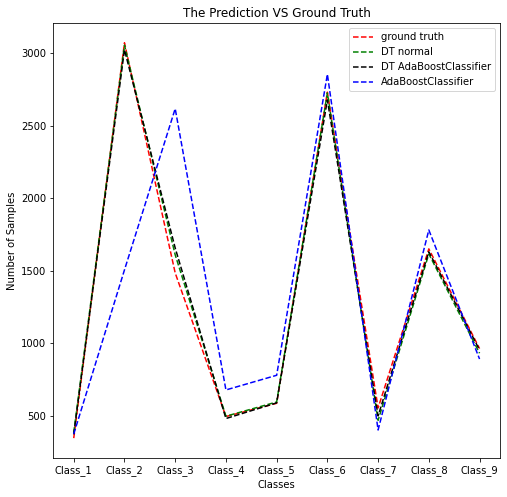

In [149]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
l1=plt.plot(ground_truth_dict.keys(),ground_truth_dict.values(),color='red',linestyle='--',label='ground truth')
l2=plt.plot(DT_result_dict.keys(),DT_result_dict.values(),color='green',linestyle='--',label='DT normal')
l3=plt.plot(Ada_DT_result_dict.keys(),Ada_DT_result_dict.values(),color='black',linestyle='--',label='DT AdaBoostClassifier')
l4=plt.plot(Ada_result_dict.keys(),Ada_result_dict.values(),color='blue',linestyle='--',label='AdaBoostClassifier')
plt.title('The Prediction VS Ground Truth')
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.legend()
plt.show()

In [138]:
from sklearn.metrics import confusion_matrix

No handles with labels found to put in legend.


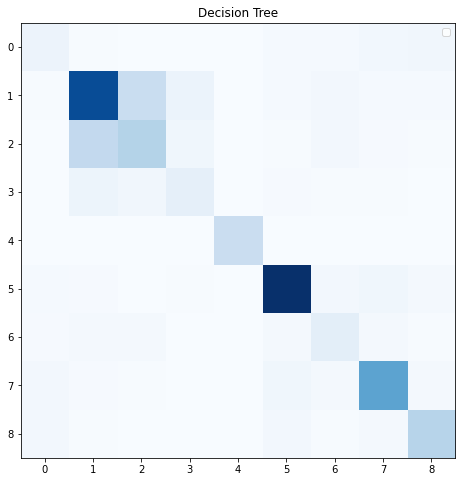

In [139]:
DT_Confusion = confusion_matrix(DT_norm_predict, Test_Y)
plt.figure(figsize=(8, 8))
plt.title('Decision Tree')
plt.legend()
plt.imshow(DT_Confusion, cmap=plt.cm.Blues)

No handles with labels found to put in legend.


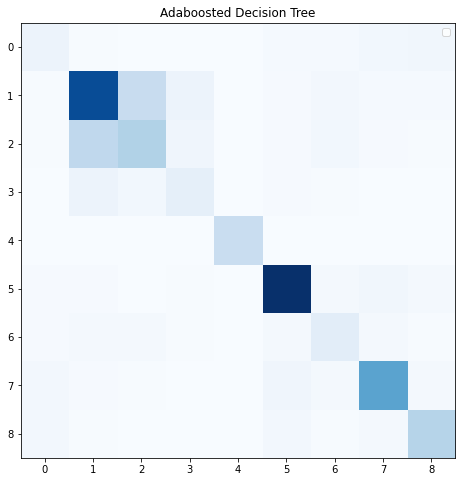

In [140]:
Ada_DT_Confusion = confusion_matrix(DT_Ada_predict, Test_Y)
plt.figure(figsize=(8, 8))
plt.title('Adaboosted Decision Tree')
plt.legend()
plt.imshow(Ada_DT_Confusion, cmap=plt.cm.Blues)

No handles with labels found to put in legend.


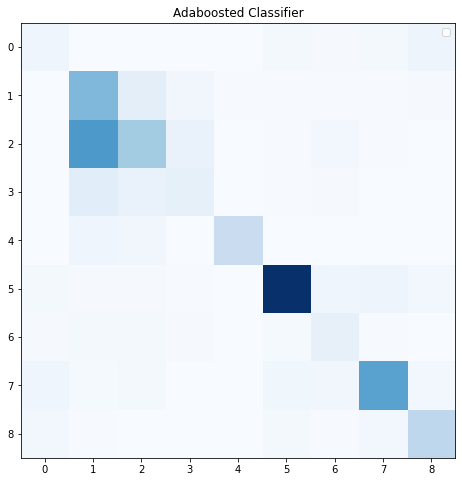

In [141]:
Ada_Confusion = confusion_matrix(Ada_Model_predict, Test_Y)
plt.figure(figsize=(8, 8))
plt.title('Adaboosted Classifier')
plt.legend()
plt.imshow(Ada_Confusion, cmap=plt.cm.Blues)